<!-- ---------------------------------------------------- -->
  <div class="col-sm-3 col-md-3 col-lg-3">
	<!-- logo -->  
    <div class="img-responsive">
      <img src="https://dl.dropboxusercontent.com/u/37919918/hedaro/pandas-ipython-tutorials-hedaro.jpg" title="Tensorflow Tutorial | Hedaro" alt="Tensorflow Tutorial | Hedaro">    
    </div>
	<!-- logo -->	
  </div>
<!-- ---------------------------------------------------- --> 
  <div class="col-sm-6 col-md-6 col-lg-6">
	<!-- Tensorflow Tutorial -->  
	  <center>
	    <br>
        <h1>Tensorflow</h1>
        <p><center>09 - Lesson</center></p>
	  </center>	
    <!-- Tensorflow Tutorial -->	
  </div>
<!-- ---------------------------------------------------- -->

# Overfitting - Part 1

In this lesson you are going to learn about the ***Validation*** set and how it helps the problem of overfitting. 

> What is overfitting? 

This is when you create a model that performs very well on your training data (hooray!). But is performs pretty bad on your test data (sad face). The good news is that there are options to deal with this issue.

> What is a validation set?  

Let's recap on the terms we are already familiar with.

* Training set - This is the data you will be training your model with.  
* Test set - This is the data you will be testing your model with. The test set should not contain data that is in the training set.  

> What do we do with the Training set?  

This is the data we are going to use to train our model.

> What do we do with the Test set?  

After training is complete, we try out our model with our Test data. If our model does well, then we did a great job in the training phase. Note that our test data will not contain any of the data we used for training.

### So What is a Validation set and why would we want one?  

A Validation set is an estimation of the Test set. The Validation set does not contain data from the Training or test set. We use the Validation set during training. Typically what we do is for every N iterations (epochs), we "test" our model using the Validation set. We want to see how our model is doing while training and before we run our model through our test data. If the Validation set says we are 95% accurate, then we can say that when we try our model on the Test set, we should get something close to 95% accuracy also. Makes sense?

> Any advantages of using a Validation set?  

Yes, by using a Validation set one can determine if overfitting is a problem. For example, lets say you started training and you notice your Training error is going down but your Validation error is going up. This is a classic sign that you have an overfitting problem.  

> what can I do if I notice that I am overfitting?  

As soon as you realize you are starting to overfit, simply stop training. This is called ***early stopping*** and it works great at preventing your model from overfitting. 

# Let's Get to Work!

In [1]:
# import libraries
import tensorflow as tf
import pandas as pd
import numpy as np
import sys
import datetime
import matplotlib.pyplot as plt
plt.style.use('ggplot') # use this plot style
%matplotlib inline

In [2]:
print('Python version ' + sys.version)
print('Tensorflow version ' + tf.VERSION)
print('Pandas version ' + pd.__version__)
print('Numpy version ' + np.__version__)

Python version 3.6.3 |Anaconda, Inc.| (default, Nov  3 2017, 12:34:11) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
Tensorflow version 1.1.0
Pandas version 0.20.3
Numpy version 1.12.1


# Function to model

    y = a * x^4 + b  


> TIP: Recommended percentages  

* Training - ***70%***
* Validation - ***15%***
* Test - ***15%***

In [3]:
# Let's generate 1000 random samples
pool = np.random.rand(1000,1).astype(np.float32)

# Shuffle the samples
np.random.shuffle(pool)

# sample size of 15%
sample = int(1000 * 0.15)

# 15% test
test_x = pool[0:sample]

# 15% validation
valid_x = pool[sample:sample*2]

# 70% training
train_x = pool[sample*2:]

print('Testing data points: ' + str(test_x.shape))
print('Validation data points: ' + str(valid_x.shape))
print('Training data points: ' + str(train_x.shape))

# Let's compute the ouput using 2 for a, 5 for b
test_y = 2.0 * test_x**4 + 5
valid_y = 2.0 * valid_x**4 + 5
train_y = 2.0 * train_x**4 + 5

Testing data points: (150, 1)
Validation data points: (150, 1)
Training data points: (700, 1)


In [4]:
df = pd.DataFrame({'x':train_x[:,0],
                   'y':train_y[:,0]})
df.head()

,x,y
0,0.568797,5.209344
1,0.214215,5.004211
2,0.724410,5.550766
3,0.462707,5.091676
4,0.236368,5.006243


In [5]:
df.describe()

,x,y
count,700.000000,700.000000
mean,0.487310,5.372739
std,0.284732,0.519767
min,0.001050,5.000000
25%,0.241555,5.006809
50%,0.476685,5.103277
75%,0.732547,5.575933
max,0.997775,6.982257


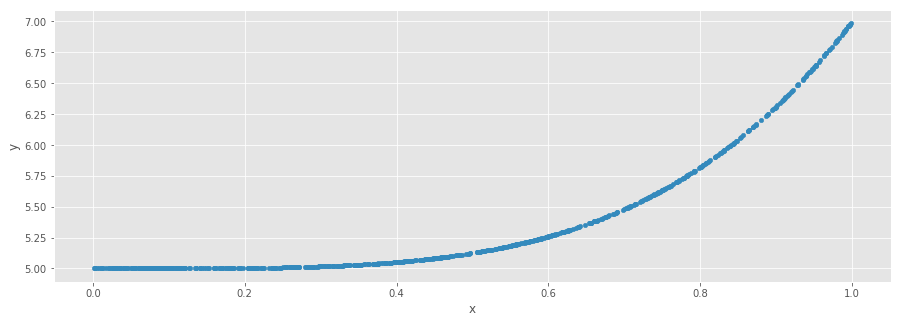

In [6]:
df.plot.scatter(x='x', y='y', figsize=(15,5));

# Helper Functions  

Make a function that will help you create layers easily

In [7]:
def add_layer(inputs, in_size, out_size, activation_function=None):
    
    # tf.random_normal([what is the size of your batches, size of output layer])
    Weights = tf.Variable(tf.truncated_normal([in_size, out_size], mean=0.1, stddev=0.1))
    
    # tf.random_normal([size of output layer])
    biases = tf.Variable(tf.truncated_normal([out_size], mean=0.1, stddev=0.1))
    
    # shape of pred = [size of your batches, size of output layer]
    pred = tf.matmul(inputs, Weights) + biases

    if activation_function is None:
        outputs = pred
    else:
        outputs = activation_function(pred)
    return outputs

# Model your Graph

Start to use W (for weight) and b (for bias) when setting up your variables. Aside from adding your ReLU activation function, it is a good idea to use Tensorflow's ***matrix multiplication function (matmul)*** as shown below.  

> The ? in the shape output just means it can be of any shape.

For the shape parameter, you can think of it like this...  

> shape = [how many data points do you have, how many features does each data point have]  

For this lesson since we are doing a simple regression, we only have one feature (x). We use the ***None*** keyword so that we are not restricted on the number of samples to feed our model. This will become more important when you learn about training using batches on a future lesson.

In [8]:
# you can adjust the number of neurons in the hidden layers here
hidden_size = 100

# placeholders
# shape=[how many samples do you have, how many input neurons]
x = tf.placeholder(tf.float32, shape=[None, 1], name="01_x")
y = tf.placeholder(tf.float32, shape=[None, 1], name="01_y")

print("shape of x and y:")
print(x.get_shape(),y.get_shape())

shape of x and y:
(?, 1) (?, 1)


Note that the input of one layer becomes the input of the next layer.

In [9]:
# create your hidden layers!
h1 = add_layer(x, 1, hidden_size, tf.nn.relu)
h2 = add_layer(h1, hidden_size, hidden_size, tf.nn.relu)

print("shape of hidden layers:")
print(h1.get_shape(), h2.get_shape())

shape of hidden layers:
(?, 100) (?, 100)


In [10]:
# Output Layers
pred = add_layer(h2, hidden_size, 1)

print("shape of output layer:")
print(pred.get_shape())

shape of output layer:
(?, 1)


In [11]:
# minimize the mean squared errors.
loss = tf.reduce_mean(tf.square(pred - y))

# pick optimizer
optimizer = tf.train.GradientDescentOptimizer(0.005)
train = optimizer.minimize(loss)

# How Good is Your model?  

Set up the following variables to calculate the accuracy rate of your model. You will do that shortly.

In [12]:
# check accuracy of model
correct_prediction = tf.equal(tf.round(pred), tf.round(y))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# Set Up Your Early Stoppage Variables  

Code borrowed from this great [Tensorflow Jupyter Notebook](https://github.com/Hvass-Labs/TensorFlow-Tutorials/blob/master/04_Save_Restore.ipynb).

In [23]:
# Best validation accuracy seen so far.
best_valid_acc = 0.0

# Iteration-number for last improvement to validation accuracy.
last_improvement = 0

# Stop optimization if no improvement found in this many iterations.
require_improvement = 1500

# Training Time!  

Surprisingly the function I was trying to model did not give me any overfitting problems even if I removed the early stopping piece.

In [33]:
# Best validation accuracy seen so far.
best_valid_acc = 0.0

# Iteration-number for last improvement to validation accuracy.
last_improvement = 0

# Stop optimization if no improvement found in this many iterations.
require_improvement = 1500

# initialize the variables
init = tf.global_variables_initializer()

# hold step and error values
t = []

# Run your graph
with tf.Session() as sess:
    
    # initialize variables
    sess.run(init)

    # Fit the function.
    for step in range(6000):

        # get your data
        train_data = {x:train_x, y:train_y}
        valid_data = {x:valid_x, y:valid_y}
        test_data = {x:test_x, y:test_y}
        
        # training in progress...
        train_loss, train_pred = sess.run([loss, train], feed_dict=train_data)        
        
        # print every n iterations
        if step%100==0:
           
            # capture the step and error for analysis
            valid_loss = sess.run(loss, feed_dict=valid_data) 
            t.append((step, train_loss, valid_loss))    
            
            # get snapshot of current training and validation accuracy       
            train_acc = accuracy.eval(train_data)
            valid_acc = accuracy.eval(valid_data)           

            # If validation accuracy is an improvement over best-known.
            if valid_acc > best_valid_acc:
                # Update the best-known validation accuracy.
                best_valid_acc = valid_acc
                
                # Set the iteration for the last improvement to current.
                last_improvement = step

                # Flag when ever an improvement is found
                improved_str = '*'
            else:
                # An empty string to be printed below.
                # Shows that no improvement was found.
                improved_str = ''   
                
            print("step %d,train_acc:%f,valid_acc:%f,train_loss:%f,valid_loss:%f %s" % (step,train_acc,valid_acc,train_loss,valid_loss,improved_str))            
                
            # If no improvement found in the required number of iterations.
            if step - last_improvement > require_improvement:
                print("No improvement found in a while, stopping optimization.")

                # Break out from the for-loop.
                break                
            
            
    # here is where you see how good of a Data Scientist you are        
    print("Accuracy on the Training Set:", accuracy.eval(train_data) )
    print("Accuracy on the Validation Set:", accuracy.eval(valid_data) ) 
    print("Accuracy on the Test Set:", accuracy.eval(test_data) )
    
    # capture predictions on test data 
    test_results = sess.run(pred, feed_dict={x:test_x})  
    df_final = pd.DataFrame({'test_x':test_x[:,0],
                             'pred':test_results[:,0]})
    
    # capture training and validation loss
    df_loss = pd.DataFrame(t, columns=['step', 'train_loss', 'valid_loss'])

step 0,train_acc:0.000000,valid_acc:0.000000,train_loss:136.133362,valid_loss:93.762268 
step 100,train_acc:0.900000,valid_acc:0.866667,train_loss:0.021042,valid_loss:0.024105 *
step 200,train_acc:0.930000,valid_acc:0.913333,train_loss:0.014997,valid_loss:0.018366 *
step 300,train_acc:0.934286,valid_acc:0.926667,train_loss:0.012898,valid_loss:0.016375 *
step 400,train_acc:0.935714,valid_acc:0.933333,train_loss:0.011563,valid_loss:0.015043 *
step 500,train_acc:0.938571,valid_acc:0.940000,train_loss:0.010290,valid_loss:0.013626 *
step 600,train_acc:0.941429,valid_acc:0.940000,train_loss:0.009272,valid_loss:0.012472 
step 700,train_acc:0.945714,valid_acc:0.940000,train_loss:0.008530,valid_loss:0.011619 
step 800,train_acc:0.947143,valid_acc:0.940000,train_loss:0.007892,valid_loss:0.010858 
step 900,train_acc:0.952857,valid_acc:0.940000,train_loss:0.007331,valid_loss:0.010169 
step 1000,train_acc:0.954286,valid_acc:0.946667,train_loss:0.006832,valid_loss:0.009541 *
step 1100,train_acc:0.95

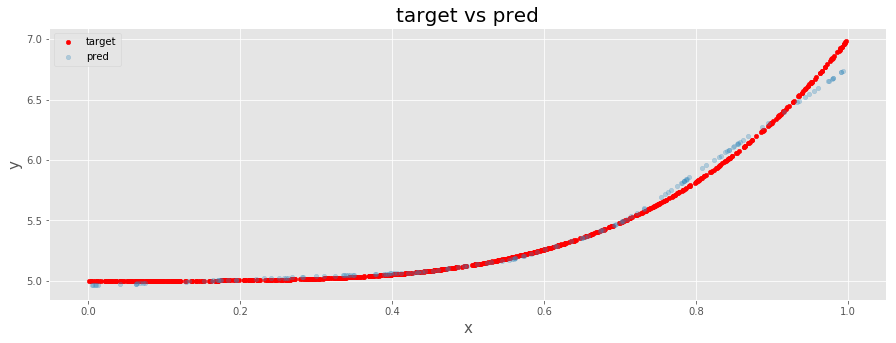

In [15]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15, 5))

# Chart 1 - Shows the line we are trying to model
df.plot.scatter(x='x', y='y', ax=axes, color='red')

# Chart 2 - Shows the line our trained model came up with
df_final.plot.scatter(x='test_x', y='pred', ax=axes, alpha=0.3)

# add a little sugar
axes.set_title('target vs pred', fontsize=20)
axes.set_ylabel('y', fontsize=15)
axes.set_xlabel('x', fontsize=15)
axes.legend(["target", "pred"], loc='best');

# Check for Overfitting  

If the ***valid_loss*** is increasing and your ***train_loss*** is decreasing then you have a problem. Since you have implemented early stopping, your model will not over train and prevents this issue from getting out of control.

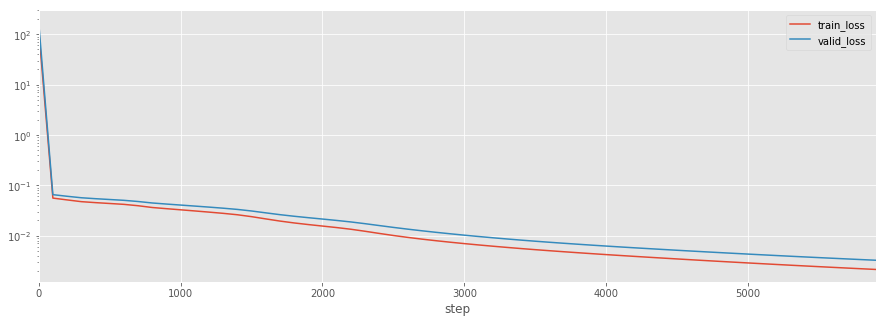

In [16]:
df_loss.set_index('step').plot(logy=True, figsize=(15,5));

# Your Turn  

> See if you can come up with an equation that your model is highly prone to overfitting. If you can get it to clearly overfit, try to use the early stopping technique and see if it helps.

<p class="text-muted">This tutorial was created by <a href="http://www.hedaro.com" target="_blank"><strong>HEDARO</strong></a></p>